# Voltage FFT Testing

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from power_analyzer.settings import V_IN

In [27]:
def graph(values):
    x = np.arange(len(values))
    plt.scatter(x, values)
    plt.show()
    
def graph_tuple(t_values):
    x = np.arange(len(t_values[0]))
    for idx, values in enumerate(t_values):
        plt.scatter(x, values, label=str(idx))
    plt.legend(loc='upper left')
    plt.show()

In [28]:
voltages = [835,823,798,768,725,676,621,567,489,428,361,316,272,246,193,174,163,176,186,214,252,300,346,406,459,540,605,662,705,750,786,814,834,835,824,802,773,729]
currents = [835,823,798,768,725,676,621,567,489,428,361,316,272,246,193,174,163,176,186,214,252,300,346,406,459,540,605,662,705,750,786,814,834,835,824,802,773,729]

In [29]:
voltages = [343,283,238,205,184,183,194,218,242,285,333,387,446,513,582,643,689,737,761,812,832,841,824,812,783,746,693,642,585,533,449,382]
currents = [457,437,440,450,461,471,480,487,492,495,495,494,489,484,476,465,454,442,432,421,404,393,384,376,369,367,365,366,368,374,379,391]

In [37]:
ideal_voltages = 120*np.sin(np.arange(32)*2*math.pi/32)

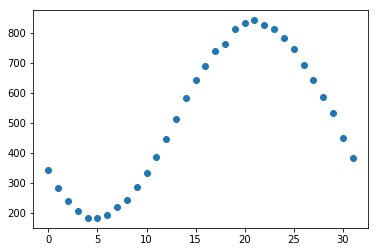

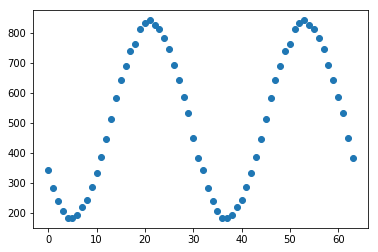

In [39]:
graph(voltages)
# print((len(voltages), len(ideal_voltages)))
# graph_tuple((voltages, ideal_voltages))

# Visually test the periodicy (is this a word?) of the wave. 
graph(np.concatenate((voltages, voltages), axis=0))

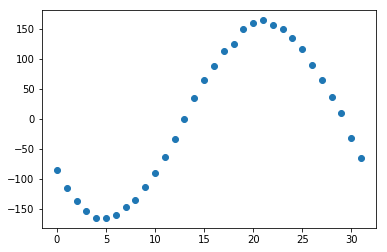

Min: -164.61384906206098 Max: 164.61384906206095


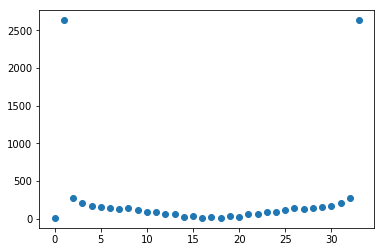

In [17]:
np_voltages = np.array(voltages)
Vin = V_IN

# translated_v = (np_voltages/Vin["num_bits"])*Vin["max_val"]

# Vmax = max(translated_v)
# Vmin = min(translated_v)
# offset = (Vmin + Vmax)/2.0

# translated_v = (translated_v - offset)/Vin["scale_factor"] / math.sqrt(2)

#Test
translated_v = ((np_voltages/1024*3.1))

Vmax = max(translated_v)
Vmin = min(translated_v)
offset = (Vmin + Vmax)/2.0

translated_v = (translated_v - offset) /(0.0060505)

graph(translated_v)
v_min = min(translated_v)
v_max = max(translated_v)
print("Min: " + str(v_min) + " Max: " + str(v_max))
fft = np.fft.fft(translated_v, 34)
graph(np.absolute(fft))
abs_fft = np.absolute(fft)

In [18]:
np.absolute(fft[33]) 

2632.292576625108

In [20]:
abs_fft[1]/34*2/math.sqrt(2)

109.48893711756605